<a href="https://colab.research.google.com/github/sathwikachirumamilla/DataScience-BusinessAnalytics/blob/main/Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**THE SPARK FOUNDATION -INTERNSHIP**

(Data Science and Business Analytics)

**TASK-3**

Perform EXPLORATORY DATA ANALYSIS on dataset SampleSuperstore

**OBJECTIVE**

As a Business partner, try to find out weak areas on where you can work to make more profit.

What all Business problem you can derive by exploring the data.

**AUTHOR-CHIRUMAMILLA SATHWIKA**

In [4]:
#import required python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
% matplotlib inline

**Data Collecting**

In [5]:
#to upload file from local drive
from google.colab import files
uploaded = files.upload()

Saving SampleSuperstore.csv to SampleSuperstore.csv


In [6]:
retail_df=pd.read_csv("SampleSuperstore.csv")         #to open and read file
retail_df.head(10)                                   #to know what dataset contains

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [7]:
type(retail_df)

pandas.core.frame.DataFrame

**Data Cleaning and formatting**

In [8]:
retail_df.shape

(9994, 13)

Dataset contains 9994 Rows and 13 Columns

In [9]:
retail_df.info(max_cols=len(retail_df))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In this Dataset there are three types of datatypes namely float64, int64, object where 8 attributes is object type data, 2 is integer type and 3 is float type.

Checking if dataset contains any null values.

In [10]:
retail_df.isna().sum().sort_values(ascending=False)

Profit          0
Discount        0
Quantity        0
Sales           0
Sub-Category    0
Category        0
Region          0
Postal Code     0
State           0
City            0
Country         0
Segment         0
Ship Mode       0
dtype: int64

So this Dataset have no null values.

In [11]:
col=retail_df.select_dtypes(include=['float64','int64']).columns  #columns having numerical values

In [12]:
n=list()
for i in col:
    if i !='Profit':       #As profit can have negative values, so Excluding profit column
        y=any(x < 0 for x in retail_df[i])
        if y==True:
            n.append(y) 
print('There are {} negative values in the data frame.'.format(len(n)))

There are 0 negative values in the data frame.


So there are no invalid or negative values in datadrame except Profit which can be true so continuing..

Now, in order to use attributes with dataframe replace some special characters like " ", "-" with underscore sign("_").In this dataset only 3 attributes contains such special character, so renaming attributes Ship Mode , Postal Code and Sub-Category

In [13]:
retail_df.rename(columns={'Ship Mode':'Ship_Mode'}, inplace=True)

In [14]:
retail_df.rename(columns={'Postal Code':'Postal_Code'}, inplace=True)

In [15]:
retail_df.rename(columns={'Sub-Category':'Sub_Category'}, inplace=True)

In [16]:
for col in retail_df.columns:
  print(col)

Ship_Mode
Segment
Country
City
State
Postal_Code
Region
Category
Sub_Category
Sales
Quantity
Discount
Profit


Successfully replaced column name with appropriate name to take advantage of it.

Let's see if dataframe has duplicate values.

In [17]:
duplicate_df=retail_df[retail_df.duplicated(['Ship_Mode', 'Segment','Country','City','State','Postal_Code','Region','Category','Sub_Category','Sales','Quantity','Discount','Profit'],keep=False)]
duplicate_df.head(10)

,Ship_Mode,Segment,Country,City,State,Postal_Code,Region,Category,Sub_Category,Sales,Quantity,Discount,Profit
568,Standard Class,Corporate,United States,Seattle,Washington,98105,West,Office Supplies,Paper,19.440,3,0.0,9.3312
591,Standard Class,Consumer,United States,Salem,Oregon,97301,West,Office Supplies,Paper,10.368,2,0.2,3.6288
935,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
950,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
1186,Standard Class,Corporate,United States,Seattle,Washington,98103,West,Office Supplies,Paper,25.920,4,0.0,12.4416
1479,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,25.920,4,0.0,12.4416
2803,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,12.840,3,0.0,5.7780
2807,Second Class,Consumer,United States,Seattle,Washington,98115,West,Office Supplies,Paper,12.960,2,0.0,6.2208
2836,Standard Class,Consumer,United States,Los Angeles,California,90036,West,Office Supplies,Paper,19.440,3,0.0,9.3312
3127,Standard Class,Consumer,United States,New York City,New York,10011,East,Office Supplies,Paper,49.120,4,0.0,23.0864


In [18]:
retail_df = pd.DataFrame.drop_duplicates(retail_df)
retail_df.shape

(9977, 13)

So there were 17 duplicate values.Successfully updated Dataframe by removing duplicate values.

In [19]:
retail_df.nunique()

Ship_Mode          4
Segment            3
Country            1
City             531
State             49
Postal_Code      631
Region             4
Category           3
Sub_Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

This dataset contains data belonging to one Country with 49 states and 531 cities, attribute Ship_Mode and Region has 4 unique values likewise Segment and Category has 3.

**EDA**

Exploratory data analysis is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods.

First let's create copy of our dataframe so that original information of dataset won't loss and to perform operation on dataframe as much we want.

In [20]:
retailnew_df=retail_df.copy()

As working with data that involves any categorical variables like Segment, Region, Category etc , best tools to visualize and compare different features of this data would be count plots. As the name suggests, a count plot displays the number of observations in each category of the variables.

Text(0.5, 0, 'SEGMENT')

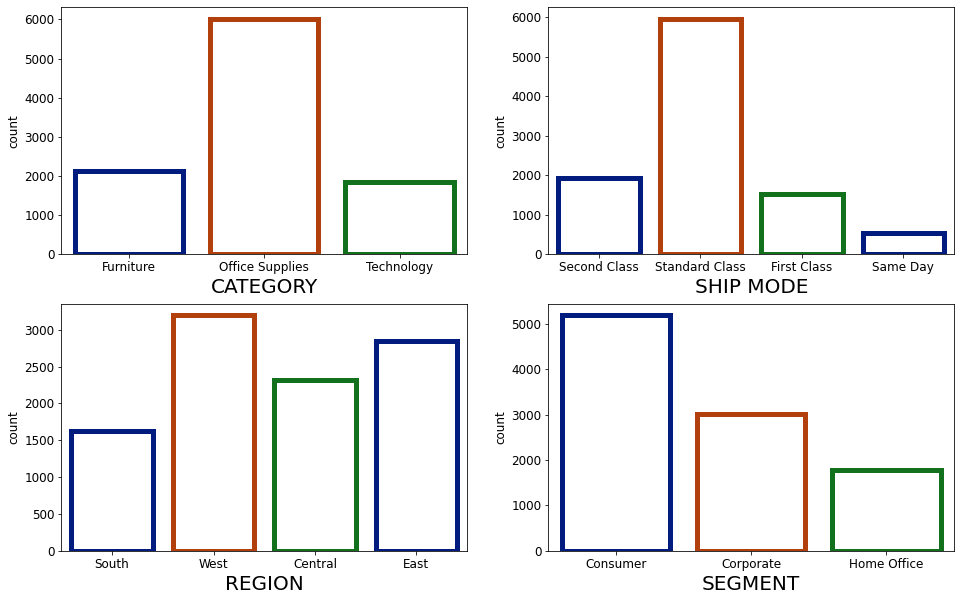

In [21]:
matplotlib.rcParams['font.size']=12                    #http://web.stanford.edu/~ymkhan/blog/2015/matplotlib_change_default_font/
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
s1=sns.countplot(x='Category',data=retailnew_df,linewidth=5,facecolor=(0,0,0,0),
                   edgecolor=sns.color_palette("dark", 3))
s1.set_xlabel('CATEGORY',fontsize=20)
plt.subplot(2,2,2)
s2=sns.countplot(x='Ship_Mode',data=retailnew_df,linewidth=5,facecolor=(0,0,0,0),
                   edgecolor=sns.color_palette("dark", 3))
s2.set_xlabel('SHIP MODE',fontsize=20)
plt.subplot(2,2,3)
s3=sns.countplot(x='Region',data=retailnew_df,linewidth=5,facecolor=(0,0,0,0),
                   edgecolor=sns.color_palette("dark", 3))
s3.set_xlabel('REGION',fontsize=20)
plt.subplot(2,2,4)
s4=sns.countplot(x='Segment',data=retailnew_df,linewidth=5,facecolor=(0,0,0,0),
                   edgecolor=sns.color_palette("dark", 3))
s4.set_xlabel('SEGMENT',fontsize=20)

In the first graph countplot shows distribution of Category section in which Office Suplies is most popular one with 6000 counts followed by Furniture and Technology.

In the second graph countplot shows distribution of types of ship mode where Standard Class is the most preferred one followed by Second Class then First class and Same day.

In the third graph countplot shows instances of different types of region in USA, where West Region has highest count followed by East then Central and South Region.

In the fourth graph countplot shows counts of Consumer segment is same count obtained by combining Corporate and Home Office Segment.

Let's get more information about numerical columns.

In [22]:
retail_df.describe()

,Postal_Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


Postal Code is a series of digit included in a postal address for the purpose of sorting mail,so this column can be excluded as it is not much interest for analysis.

Average Sales value is of 230.15(approx)USD ranging from 0.0 to 22638.48 USD. On Average 4 quantity sold for each transaction ranging from 0 to 14. Average Discount offered is 15.6% on each transaction ranging from 0 to 80%. Average profit made on each transaction is 29 USD ranging from -6600 to 8400 USD.

In [23]:
retailnew_df.drop('Postal_Code',axis='columns',inplace=True)   #to remove Postal Code attribute.

Defining New column

1.Discount rate in dataframe which is calculated by Discount times 100 , this will be more helpful in visualizing data furthur.

In [24]:
retailnew_df['Discount_rate']=(retailnew_df.Discount*100)

2.#https://courses.lumenlearning.com/boundless-finance/chapter/profitability-ratios/ (Analysis of Profit Margin Ratio can be found here) PROFIT MARGIN as new column which is calculated by (Net-profit/Sales).

Profit margin measures the amount of profit a company earns from its sales.
For example, a company has $200,000$ USD in sales and $50,000$ USD in profit for particular period.

Net profit margin = $50,000 $/ $200,000$ = 25%

This means that a company has $0.25 of net income for every dollar of sales.

In [25]:
retailnew_df['Profit_margin']=((retailnew_df.Profit/retailnew_df.Sales)*100)

In [26]:

retailnew_df.describe()

,Sales,Quantity,Discount,Profit,Discount_rate,Profit_margin
count,9977.000000,9977.000000,9977.000000,9977.00000,9977.000000,9977.000000
mean,230.148902,3.790719,0.156278,28.69013,15.627844,12.011354
std,623.721409,2.226657,0.206455,234.45784,20.645520,46.663769
min,0.444000,1.000000,0.000000,-6599.97800,0.000000,-275.000000
25%,17.300000,2.000000,0.000000,1.72620,0.000000,7.500000
50%,54.816000,3.000000,0.200000,8.67100,20.000000,27.000000
75%,209.970000,5.000000,0.200000,29.37200,20.000000,36.250000
max,22638.480000,14.000000,0.800000,8399.97600,80.000000,50.000000


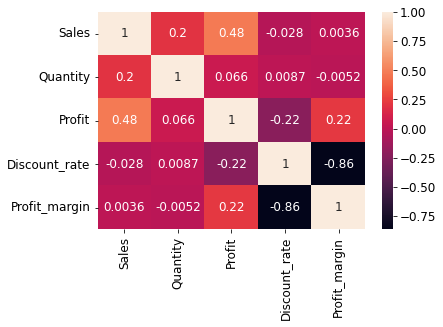

In [27]:
d=retailnew_df.drop('Discount',axis='columns',inplace=False)      #dropping Discount column just for now to get better view of heatmap
df_corr=d.corr()
sns.heatmap(df_corr,xticklabels=df_corr.columns,yticklabels=df_corr.columns,annot=True)

**Do offering more discounts for products results in more Sales of the same or offering no Discount how it effects Sales?**

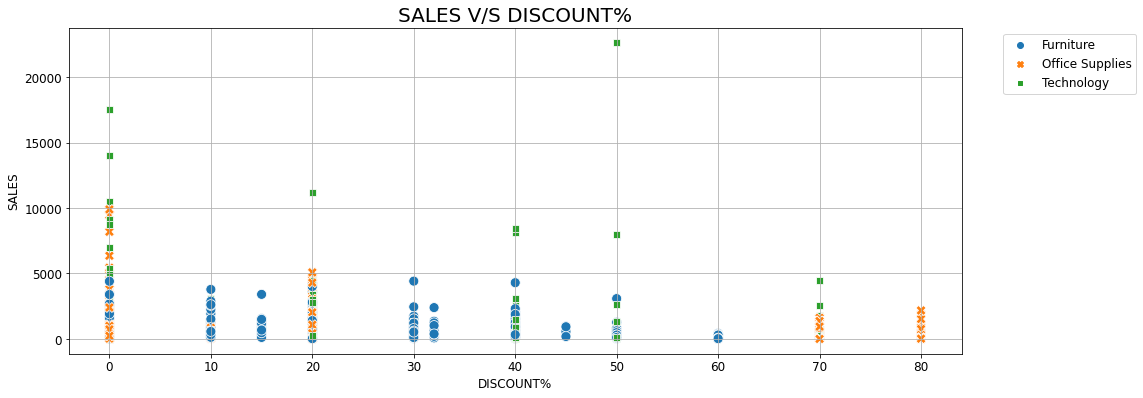

In [28]:
plt.figure(figsize=(16,6))
s1=sns.scatterplot(y='Sales', x='Discount_rate' ,hue='Category',data=retailnew_df,style='Category',s=100)
s1.set_xlabel('DISCOUNT%',fontsize=12)
s1.set_ylabel('SALES',fontsize=12)
s1.set_title('SALES V/S DISCOUNT%',fontsize=20)
plt.grid()
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")   #Shifting legend outside graph

Highest Sale is by Technology sector with 50% Discount of more than $20k$ USD and second and third highest sale is with 0% Discount of between $13k$ and $20k$ USD. There is much lesser Sales amount with more than 60% Discount. So when 50% of discount is given there is not much no of sales but it has the highest sale. There is much sales with 0% of discount with second most highest sale.

As Sales above than 5000 USD is mostly technology supplies and some Office supplies to get better view we can limit y axis upto 5000 USD


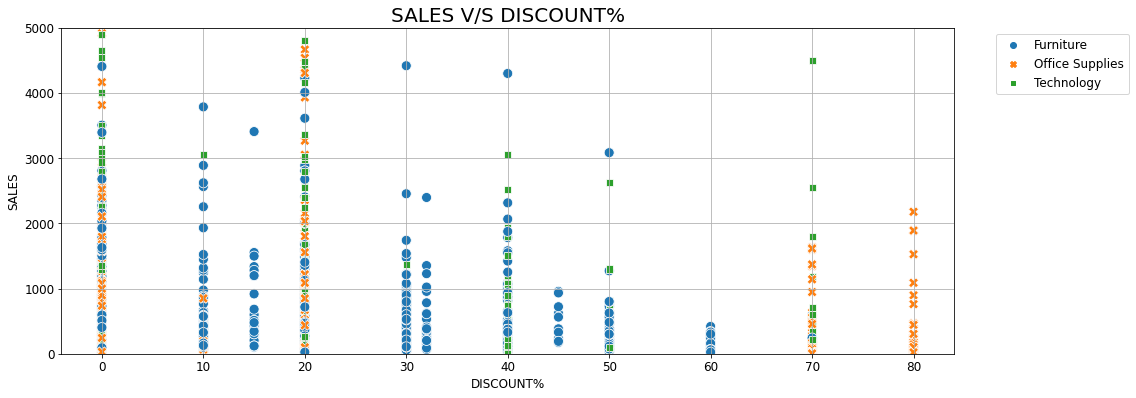

In [29]:
plt.figure(figsize=(16,6))
s1=sns.scatterplot(y='Sales', x='Discount_rate' ,hue='Category',data=retailnew_df,style='Category',s=100)
plt.ylim([0,5000])
s1.set_xlabel('DISCOUNT%',fontsize=12)
s1.set_ylabel('SALES',fontsize=12)
s1.set_title('SALES V/S DISCOUNT%',fontsize=20)
plt.grid()
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

Office Supplies is the only one having 80% of discount.

Lets dig deeper how Discount can effect sale and Profit margin.



Text(0.5, 1.0, 'DISCOUNT V/S NET PROFIT TO SALES RATIO ')

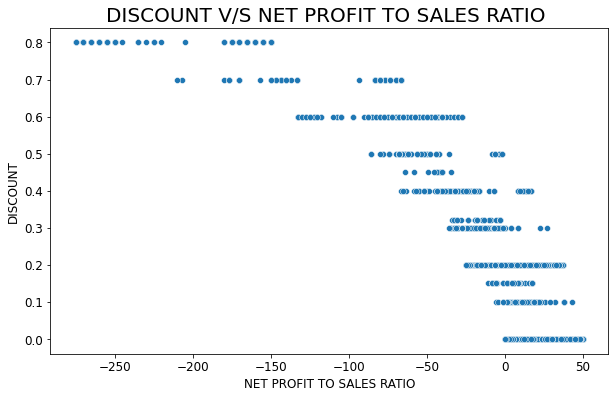

In [30]:
plt.figure(figsize=(10,6))
s1=sns.scatterplot(x='Profit_margin',y='Discount',data=retailnew_df)
s1.set_xlabel('NET PROFIT TO SALES RATIO')
s1.set_ylabel('DISCOUNT')
s1.set_title('DISCOUNT V/S NET PROFIT TO SALES RATIO ',fontsize=20)

Now from the following graph it can be seen that for high discount leads to negative profit margin. For values of discount between 60% to 80% we have profit margin <0 which means for some Sub Categories it means their Total Sale is less than Total loss. We have positive profit margin when discount is less than 10%


In [31]:
Discount_greater_50=retailnew_df[retailnew_df['Discount_rate']>=50]              #Sub-Category offering more than 50% Discount


In [32]:

Discount_greater_50['Sub_Category'].unique()

array(['Appliances', 'Binders', 'Bookcases', 'Furnishings', 'Tables',
       'Machines'], dtype=object)

So, there are 6 Sub-Category out of 17 offering more than 50% of Discount.

### **Which Sub-Category mostly has more than 50% Discount rate?**

Text(0.5, 0, 'Total Count')

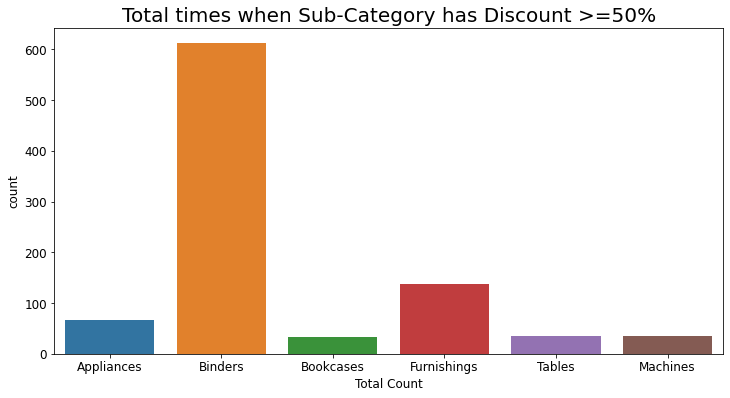

In [33]:
plt.figure(figsize=(12,6))
s1=sns.countplot(data=Discount_greater_50,x='Sub_Category')
s1.set_title('Total times when Sub-Category has Discount >=50%',fontsize=20)
s1.set_xlabel('Total Count')

Most of the times Binders Sub-Category has more than 50% Discount, which may be also due to reason which product usually customer's buy, hence next question can be

# **Which is the most popular products among customers?**



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Text(0.5, 0, 'Sub-Category')

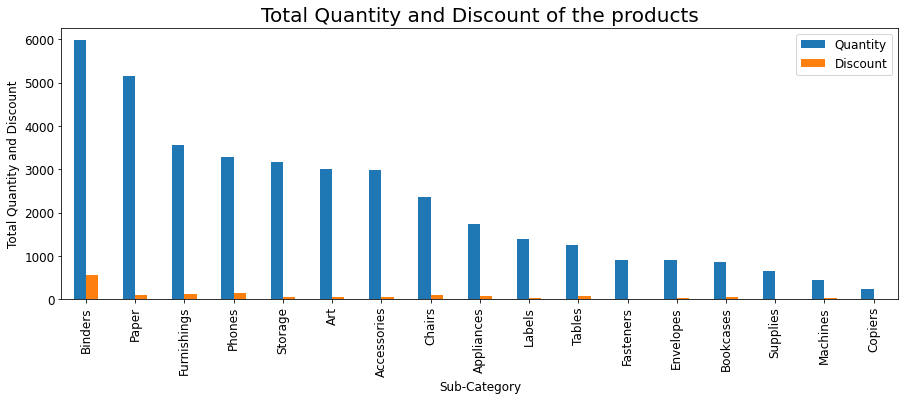

In [34]:
total_Quantity = retailnew_df.groupby('Sub_Category')['Quantity','Discount'].sum().sort_values('Quantity',ascending = False).plot(kind='bar',figsize = (15, 5)) 
plt.title('Total Quantity and Discount of the products',fontsize=20)
plt.ylabel('Total Quantity and Discount',fontsize=12)
plt.xlabel('Sub-Category',fontsize=12)

This graph represents Binders and Papers are most popular among customers with Binders have highest total Discount, Copiers being the least popular.

**Which sub-Category has highest and lowest total Sales and profit?**



Text(0, 0.5, 'Total Sales and Profit/Loss')

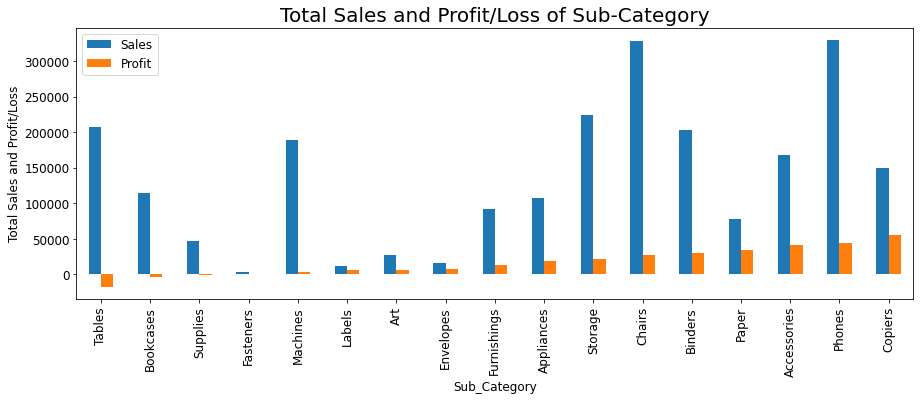

In [35]:
df_SubCategories = retailnew_df.groupby(['Sub_Category'])[['Sales', 'Profit']].sum()   #Defining new dataframe with columns Sales,Discount,Profit according to Sub-Category
df_SubCategories.sort_values('Profit', ascending = True)[['Sales', 'Profit']].plot(kind = 'bar',
                                                                             figsize = (15, 5))
plt.title('Total Sales and Profit/Loss of Sub-Category',fontsize=20)
plt.ylabel('Total Sales and Profit/Loss',fontsize=12)
# plt.xlabel('Sub-Category',fontsize=12)

In [37]:
retailnew_df['Selling_Price_per_unit']=retailnew_df.Sales/retailnew_df.Quantity

In [38]:
df_SubCategories1=retailnew_df.groupby('Sub_Category')[['Selling_Price_per_unit','Discount_rate']].mean()

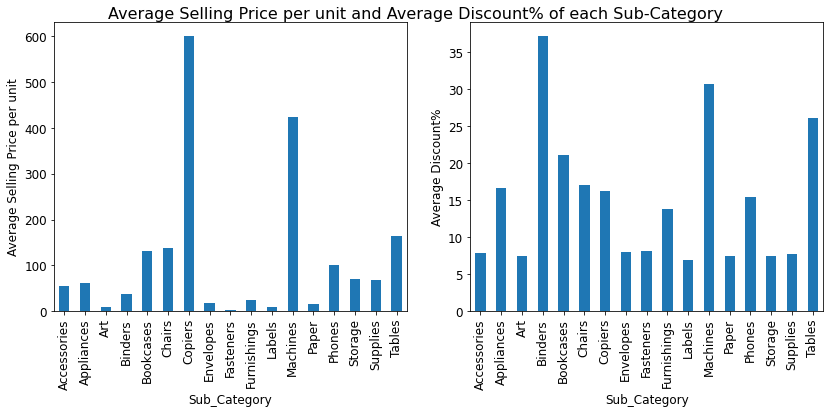

In [39]:
plt.suptitle('Average Selling Price per unit and Average Discount% of each Sub-Category',fontsize='16')
plt.subplot(1,2,1)
df_SubCategories1['Selling_Price_per_unit'].plot(kind = 'bar',figsize=(12,6))  
plt.ylabel('Average Selling Price per unit')                                                                          
plt.subplot(1,2,2)
df_SubCategories1['Discount_rate'].plot(kind = 'bar',figsize=(12,6))   
plt.ylabel('Average Discount%')  
plt.tight_layout(pad=2)

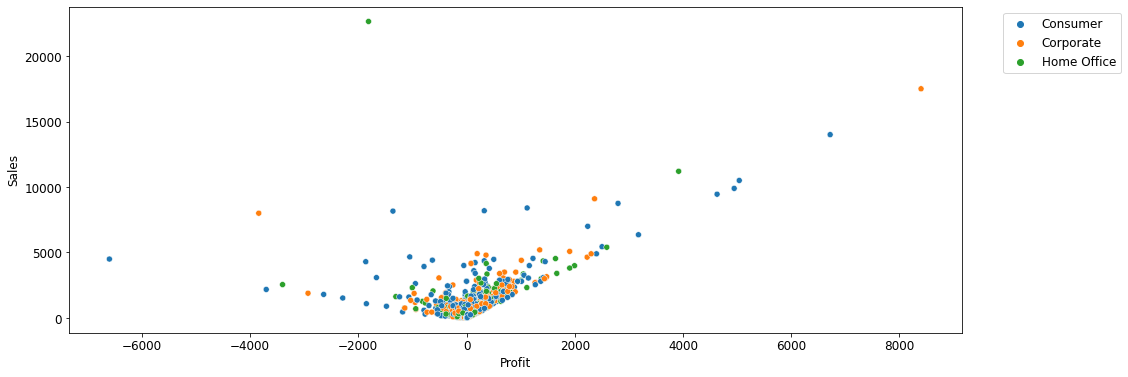

In [40]:
plt.figure(figsize=(16,6))
sns.scatterplot(x='Profit',y='Sales',data=retailnew_df,hue='Segment')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")   #Shifting legend outside graph

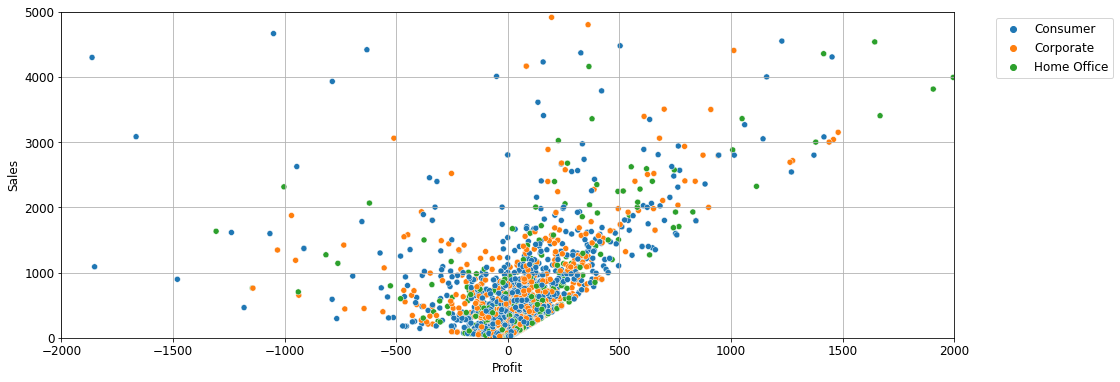

In [41]:
plt.figure(figsize=(16,6))
sns.scatterplot(x='Profit',y='Sales',data=retailnew_df,hue='Segment')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")   #Shifting legend outside graph
plt.ylim([0,5000])
plt.xlim([-2000,2000])
plt.grid()


# **Which segment results mostly in negative profit?**

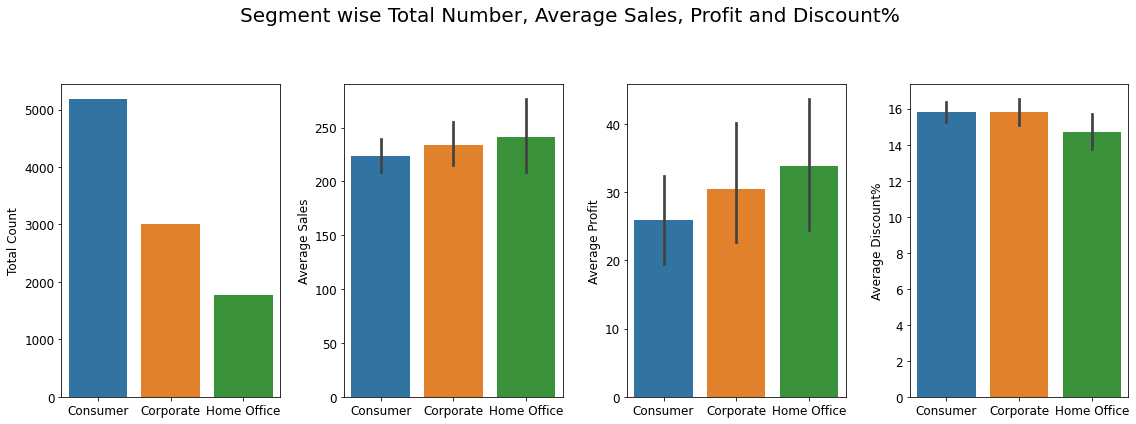

In [42]:
fig, ax = plt.subplots(1,4, figsize=(16, 6))
fig.suptitle('Segment wise Total Number, Average Sales, Profit and Discount%',fontsize='20')     #Setting Main Title
s1=sns.countplot(x='Segment',data=retailnew_df,ax=ax[0])
s1.set(xlabel=None)
s1.set(ylabel='Total Count')
s2=sns.barplot(x='Segment',y='Sales',data=retailnew_df,ax=ax[1])
s2.set(xlabel=None)
s2.set(ylabel='Average Sales')
s3=sns.barplot(x='Segment',y='Profit',data=retailnew_df,ax=ax[2])
s3.set(xlabel=None)
s3.set(ylabel='Average Profit')
s4=sns.barplot(x='Segment',y='Discount_rate',data=retailnew_df,ax=ax[3])
s4.set(xlabel=None)
s4.set(ylabel='Average Discount%')
fig.tight_layout()                  #https://stackoverflow.com/questions/7066121/how-to-set-a-single-main-title-above-all-the-subplots-with-pyplot
fig.subplots_adjust(top=0.8)       #(To adjust Main title so it don't overlap with rest graphs)
plt.show()

On the first most graph it shows Total number Consumers, Corporate, Home Office Segments. On the second graph it shows Average profit by each segment ,On the third graph we have Discount% distribution with respect to each segment.

Though Consumer is highest in total still results Lowest Sales and Profit, where as Home Office Segment lower in total still results in highest sales and profit.

Now, let's examine Sub Category wise Profits with respect to each Segments.



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

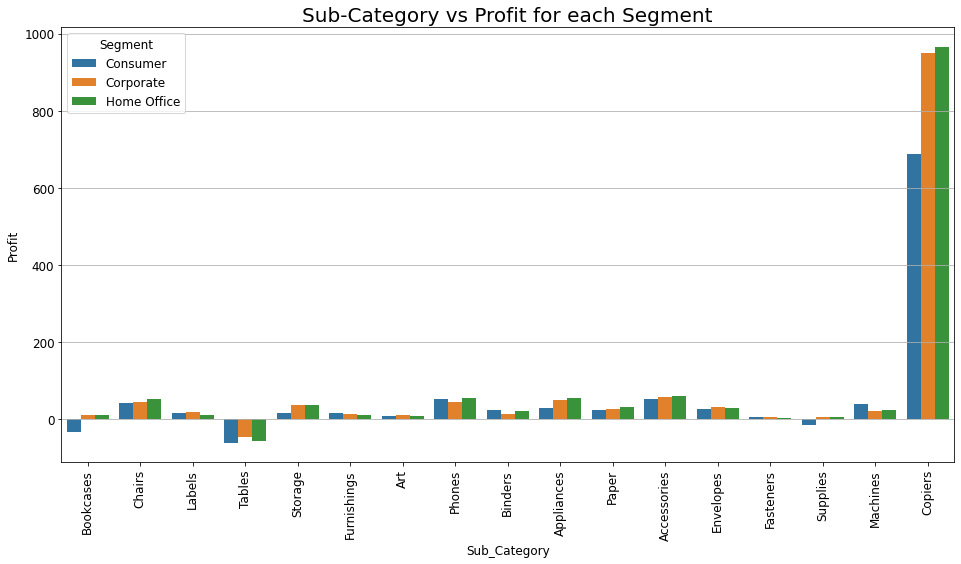

In [43]:
plt.figure(figsize=(16,8))
sns.barplot(x='Sub_Category',y='Profit',data=retailnew_df,ci=None,hue='Segment');
plt.title('Sub-Category vs Profit for each Segment',fontsize=20)
plt.grid(axis='y')
plt.xticks(rotation=90)

Machines and Phones gain more profit in Consumer Segment.Chairs, Accessories, Appliances, Copiers gain more profit in Home Office Segment. Envelops, Labels gain more profit in Corporate segment Consumer segment are mainly the one result in negative profit values(BookCases,Supplies,Tables). Tables are the one in which all segments shows negative profit.

# **How sales or profit depends on Region wise or state wise?**

Text(0.5, 1.0, 'Region wise Average Sales, Profit and Discount%')

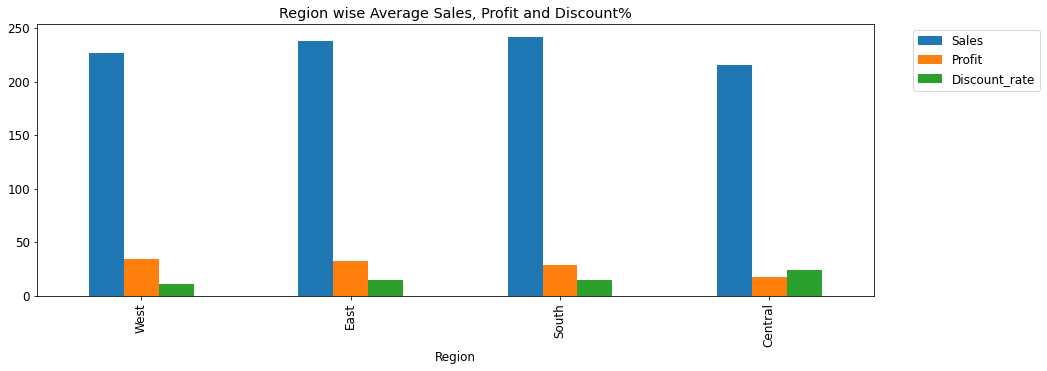

In [44]:
df_region= retailnew_df.groupby(['Region'])[['Sales', 'Discount_rate', 'Profit']].mean()
df_region.sort_values('Profit', ascending = False)[['Sales', 'Profit','Discount_rate']].plot(kind = 'bar',
                                                                              figsize = (15, 5))
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")   #Shifting legend outside graph
plt.title('Region wise Average Sales, Profit and Discount%')

In [45]:
Central_region_df=retailnew_df[retailnew_df.Region=='Central'][['State','City','Sales','Profit','Discount_rate',]].sort_values('Sales',ascending=False)

In [46]:

Central_region_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2319 entries, 6826 to 4101
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          2319 non-null   object 
 1   City           2319 non-null   object 
 2   Sales          2319 non-null   float64
 3   Profit         2319 non-null   float64
 4   Discount_rate  2319 non-null   float64
dtypes: float64(3), object(2)
memory usage: 108.7+ KB


Created new DataFrame with Region as Central containing 5 columns namely State, City, Sales, Profit, Discount_rate.



In [47]:
Central_region_df.nunique()

State              13
City              181
Sales            1917
Profit           2074
Discount_rate       9
dtype: int64

Text(0.5, 0, 'Central States')

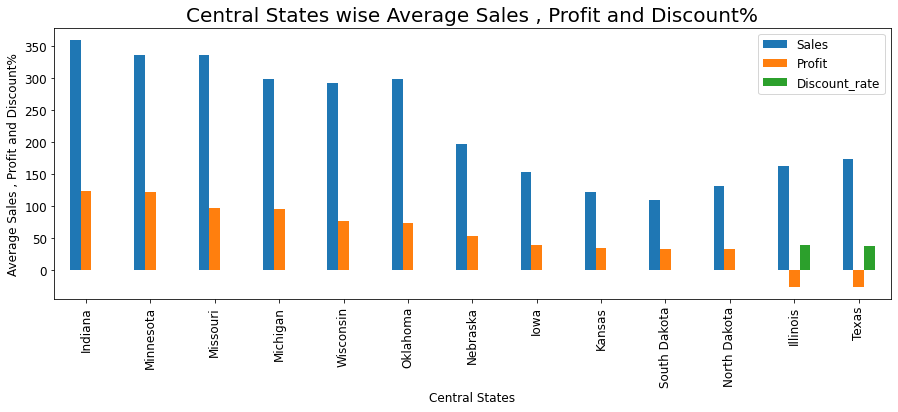

In [48]:
df_CentralCity=Central_region_df.groupby(['State'])[['Sales','Profit','Discount_rate']].mean()
df_CentralCity.sort_values('Profit', ascending = False)[['Sales', 'Profit','Discount_rate']].plot(kind = 'bar',
                                                                              figsize = (15, 5))
plt.title('Central States wise Average Sales , Profit and Discount%',fontsize=20)
plt.ylabel('Average Sales , Profit and Discount%',fontsize=12)
plt.xlabel('Central States',fontsize=12)

Central Region States like Texas, Illinois have lowest average Profit although have more Sales than States like South Dakota , North Dakota, Kansas which has positive profit than them.

Is there any difference whether discount is present or not?



In [49]:
No_Discount_df=retailnew_df[retailnew_df['Discount']==0]
No_Discount_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4787 entries, 0 to 9993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Ship_Mode               4787 non-null   object 
 1   Segment                 4787 non-null   object 
 2   Country                 4787 non-null   object 
 3   City                    4787 non-null   object 
 4   State                   4787 non-null   object 
 5   Region                  4787 non-null   object 
 6   Category                4787 non-null   object 
 7   Sub_Category            4787 non-null   object 
 8   Sales                   4787 non-null   float64
 9   Quantity                4787 non-null   int64  
 10  Discount                4787 non-null   float64
 11  Profit                  4787 non-null   float64
 12  Discount_rate           4787 non-null   float64
 13  Profit_margin           4787 non-null   float64
 14  Selling_Price_per_unit  4787 non-null   

So here we have much data for no discount type with 4787 entries out of 9977. It would be interesting to dig deep in this, Now let's see how Sales V/S Profit graph varies for no discount provided. Also let's create Dataframe having more than 0% Discount.



In [50]:
Discount_df=retailnew_df[retailnew_df['Discount']>0]

Text(0.5, 48.0, 'Sales')

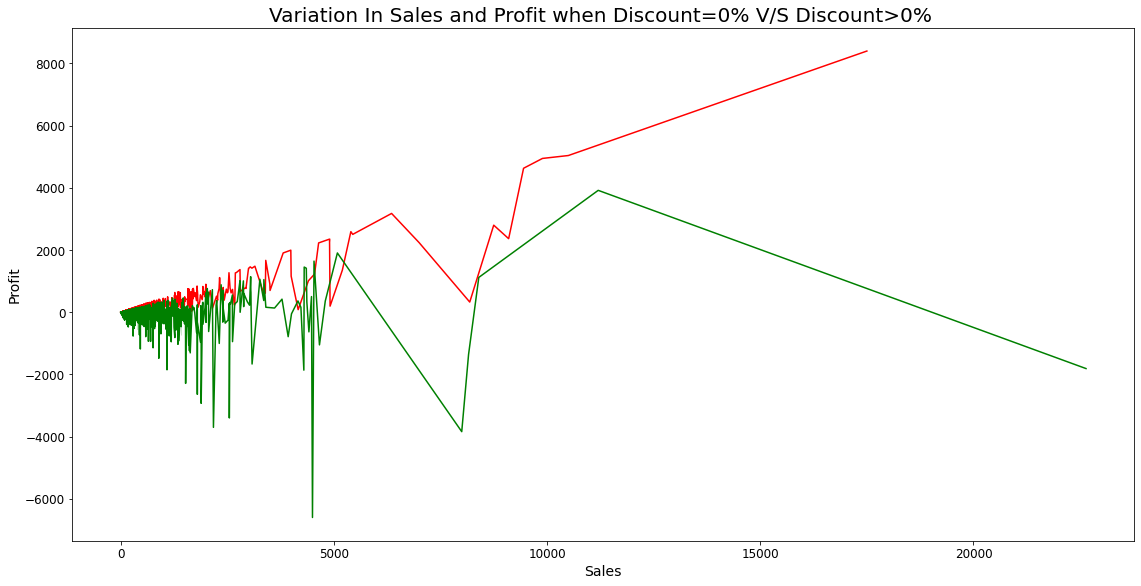

In [51]:
plt.figure(figsize=(16,8))
sns.lineplot(x='Sales',y='Profit',data=No_Discount_df, color="r")
sns.lineplot(x='Sales',y='Profit',data=Discount_df, color="g")
plt.tight_layout()
plt.title('Variation In Sales and Profit when Discount=0% V/S Discount>0% ',fontsize=20)
plt.ylabel('Profit',fontsize=14)
plt.xlabel('Sales',fontsize=14)

We can clearly see there is great impact of having discounts on Sales and Profit , As here Green line represents Sales V/s Profit graph when discount is present and red line represents Sales V/S Profit graph when no discount is present. Though it is interesting to note that Highest Sale is when discount is present.

Let's have overall view of states according to sales , profit and Discount%



In [52]:
State_df=retailnew_df.groupby('State')[['Sales','Profit','Discount']].sum()

Text(0.5, 0, 'State')

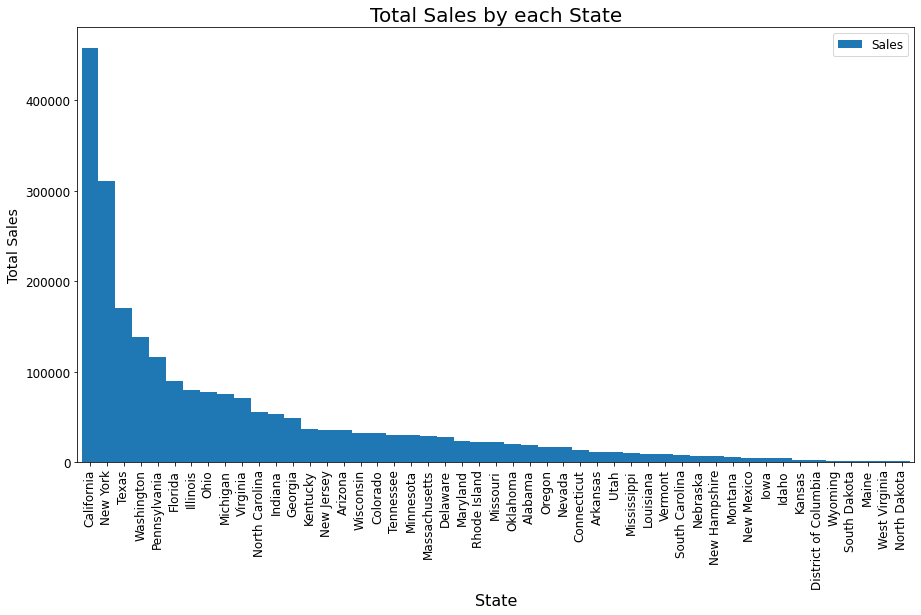

In [53]:
State_df.sort_values('Sales', ascending = False)[['Sales']].plot(kind = 'bar',width=1,figsize=(15,8))
plt.title('Total Sales by each State',fontsize=20)
plt.ylabel('Total Sales',fontsize=14)
plt.xlabel('State',fontsize=16)

Text(0.5, 0, 'State')

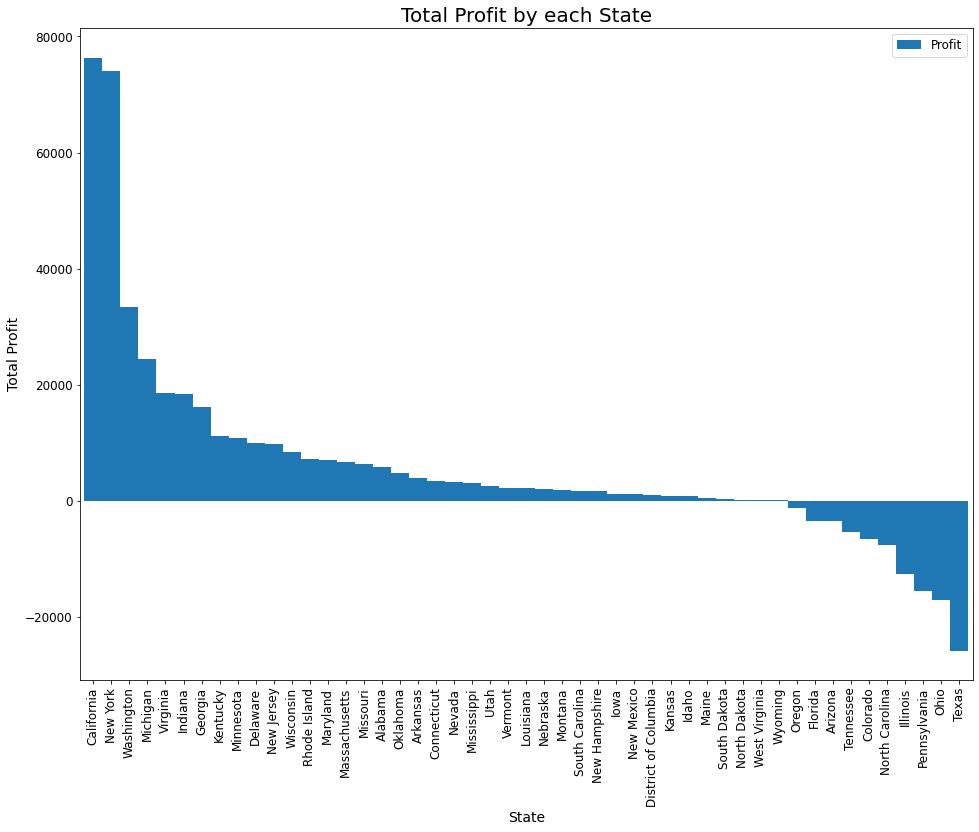

In [54]:
State_df.sort_values('Profit', ascending = False)[['Profit']].plot(kind = 'bar',width=1,figsize=(16,12))
plt.title('Total Profit by each State',fontsize='20')
plt.ylabel('Total Profit',fontsize=14)
plt.xlabel('State',fontsize=14)

Text(0.5, 0, 'State')

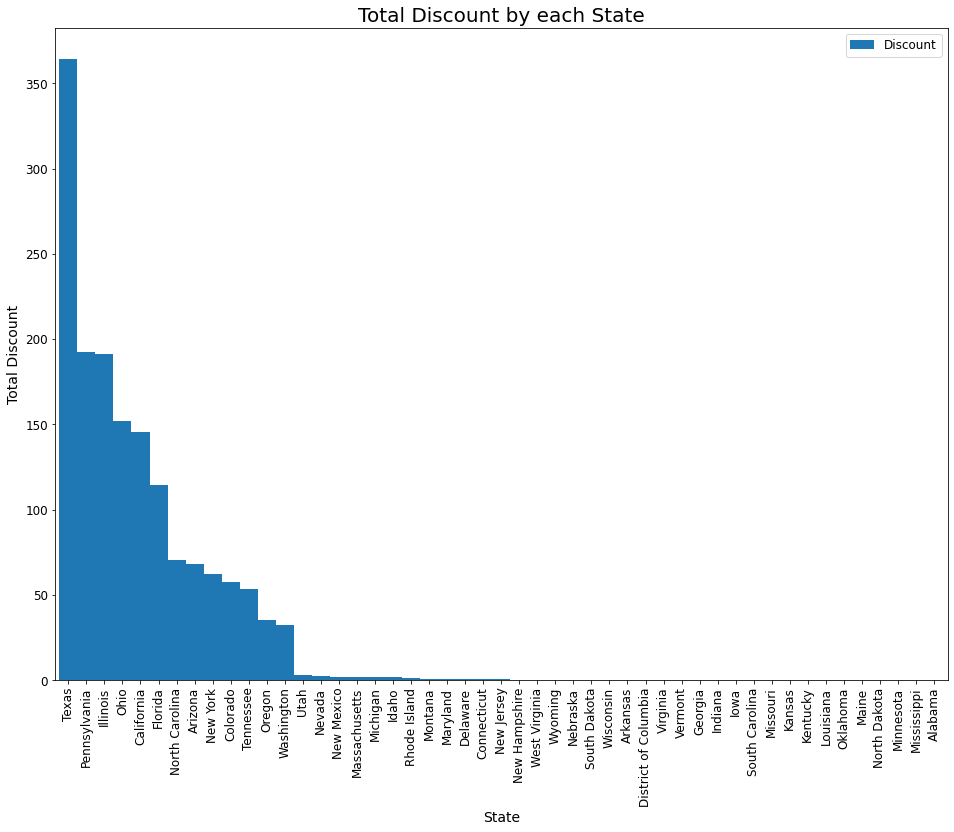

In [55]:
State_df.sort_values('Discount', ascending = False)[['Discount']].plot(kind = 'bar',width=1,figsize=(16,12))
plt.title('Total Discount by each State',fontsize='20')
plt.ylabel('Total Discount',fontsize=14)
plt.xlabel('State',fontsize=14)

In [56]:
Texas_City_df=retailnew_df[retailnew_df.State=='Texas'][['City','Sales','Profit','Discount_rate','Ship_Mode',]].sort_values('Sales',ascending=False)

Text(0.5, 0, 'Texas Cities')

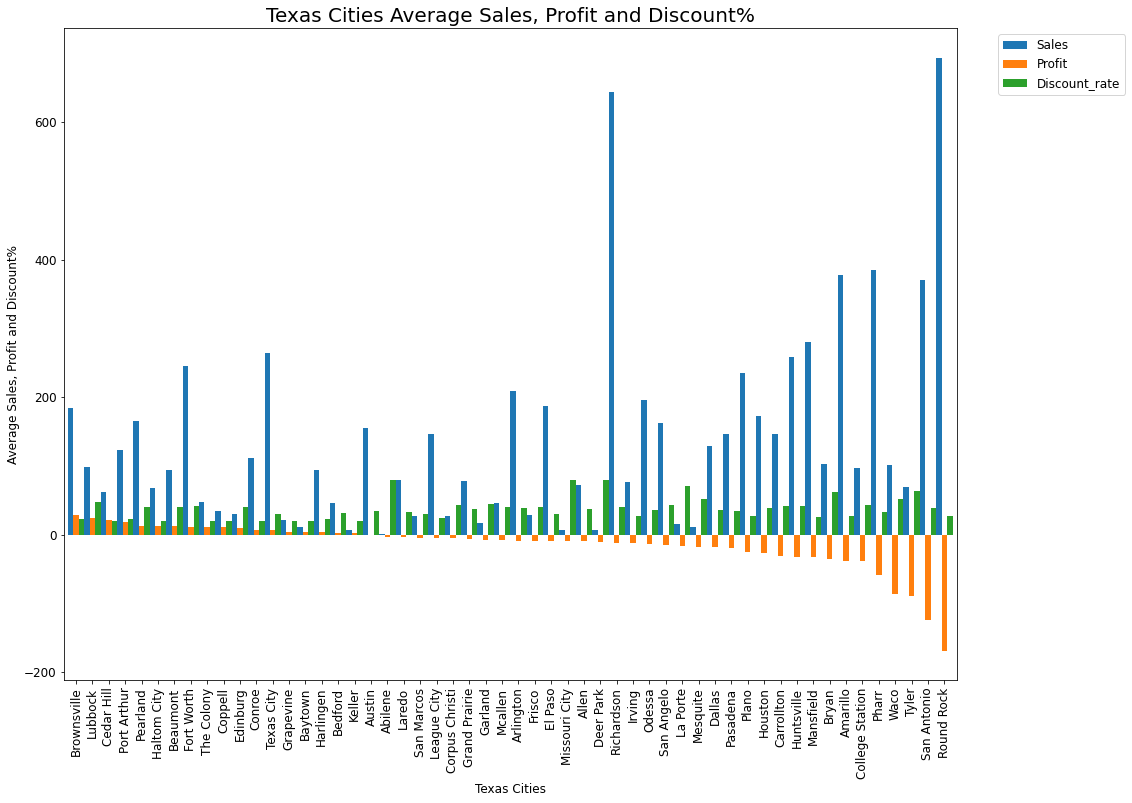

In [57]:
Texas_City_df=Texas_City_df.groupby(['City'])[['Sales','Profit','Discount_rate']].mean()
Texas_City_df.sort_values('Profit', ascending = False)[['Sales', 'Profit','Discount_rate']].plot(kind = 'bar',width=1,figsize=(16,12))
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left") 
plt.title('Texas Cities Average Sales, Profit and Discount%',fontsize=20)
plt.ylabel('Average Sales, Profit and Discount%',fontsize=12)
plt.xlabel('Texas Cities',fontsize=12)

In [58]:
low_profit_df=retailnew_df[retailnew_df.Profit_margin<0][['State','Profit_margin','Ship_Mode','Segment','Discount','Category','Sub_Category','Sales','City','Profit']].sort_values('Profit_margin',ascending=False)

In [59]:
low_profit_df['State'].unique()

array(['New York', 'California', 'Texas', 'Tennessee', 'Washington',
       'Pennsylvania', 'Arizona', 'Florida', 'Illinois', 'Ohio',
       'Colorado', 'Oregon', 'North Carolina', 'Rhode Island',
       'Connecticut', 'Maryland', 'Massachusetts', 'New Hampshire',
       'West Virginia', 'New Jersey', 'Delaware', 'Nevada', 'New Mexico'],
      dtype=object)

In [60]:
low_profit_df['Sub_Category'].unique()

array(['Chairs', 'Bookcases', 'Storage', 'Accessories', 'Tables',
       'Machines', 'Furnishings', 'Phones', 'Supplies', 'Fasteners',
       'Binders', 'Appliances'], dtype=object)

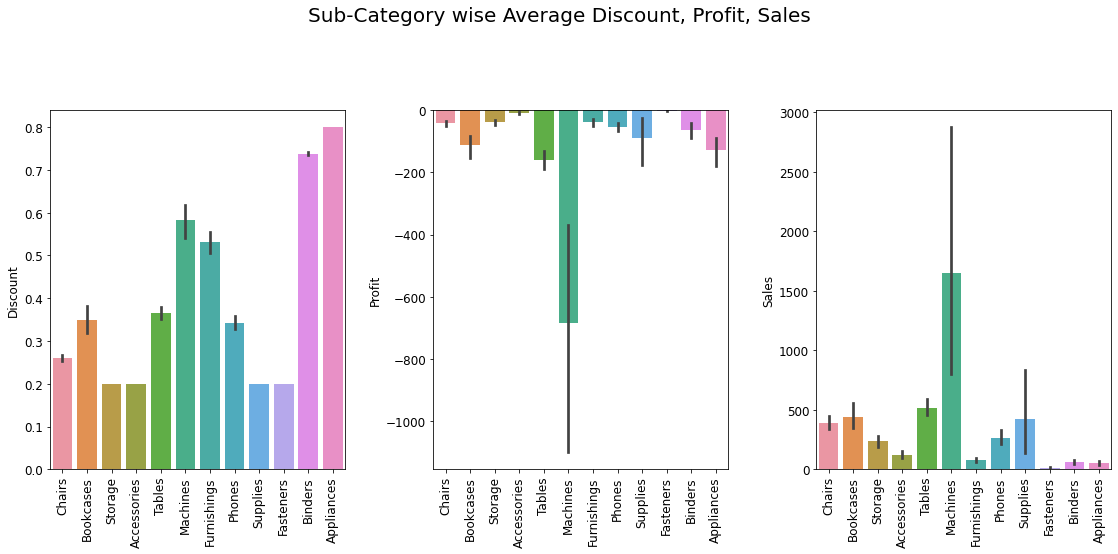

In [61]:
fig,ax=plt.subplots(1,3,figsize=(16,8))
fig.suptitle('Sub-Category wise Average Discount, Profit, Sales',fontsize=20)
s1=sns.barplot(x='Sub_Category',y='Discount',data=low_profit_df,ax=ax[0])
s1.set(xlabel=None)
s1.set_xticklabels(labels=['Chairs','Bookcases','Storage','Accessories','Tables','Machines',
       'Furnishings', 'Phones','Supplies','Fasteners','Binders', 'Appliances'
       ],rotation=90)
s1.set(ylabel='Discount')
s2=sns.barplot(x='Sub_Category',y='Profit',data=low_profit_df,ax=ax[1])
s2.set_xticklabels(labels=['Chairs','Bookcases','Storage','Accessories','Tables','Machines',
       'Furnishings', 'Phones','Supplies','Fasteners','Binders', 'Appliances'
       ],rotation=90)
s2.set(xlabel=None)
s2.set(ylabel='Profit')
s3=sns.barplot(x='Sub_Category',y='Sales',data=low_profit_df,ax=ax[2])
s3.set_xticklabels(labels=['Chairs','Bookcases','Storage','Accessories','Tables','Machines',
       'Furnishings', 'Phones','Supplies','Fasteners','Binders', 'Appliances'
       ],rotation=90)
s3.set(xlabel=None)
s3.set(ylabel='Sales')
plt.tight_layout(pad=2)
fig.subplots_adjust(top=0.8)

# **Which Discount rate draws more attention of Customers?**
To calculate this inference first let us see how many times individual Discount has appeared


In [62]:
df=retailnew_df['Discount_rate'].value_counts() 
df1=df.to_frame()             #for Conversing Series into Dataframe
df1.rename(columns={'Discount_rate':'Total_Count'}, inplace=True)

In [63]:

df1

,Total_Count
0.0,4787
20.0,3653
70.0,418
80.0,299
30.0,226
40.0,206
60.0,138
10.0,94
50.0,66
15.0,52


In [64]:
df2=retailnew_df.groupby('Discount_rate')[['Quantity']].sum()
df2.rename(columns={'Quantity':'Total_Quantity'}, inplace=True)

In [65]:
df2

,Total_Quantity
Discount_rate,
0.0,18230
10.0,373
15.0,198
20.0,13649
30.0,847
32.0,105
40.0,786
45.0,45
50.0,241


Most of the entries was with 0% Discount and 20% Discount which can be bias for our given question as ultimately Total Quantity sold in these Discount% can naturaly be more than others because so they are more in number,

So taking this into account let's calculate ratio of Total quantity to Total Count of each Category, which means suppose two Discount rate is given 1% and 2% and their respective ratio is 2.5 and 3.0 which means at per count of 1% ( 2.5 things are sold ) where as at per count of 2% ( 3.0 things are sold ) hence Customers are more attracted towards 2% Discount rate.

Now counting Total Quantity of each Category, Like how many total goods was sold when Discount was 0%, 10% and so on.

In [66]:
ratio_df=df2.Total_Quantity/df1.Total_Count
ratio_df1=ratio_df.to_frame()

In [67]:
ratio_df1.rename(columns={0:'Ratio'}, inplace=True)

In [68]:
ratio_df1.reset_index(level=0, inplace=True)
ratio_df1.rename(columns={'index':'Discount_rate'}, inplace=True)

In [69]:
ratio_df1

,Discount_rate,Ratio
0,0.0,3.808231
1,10.0,3.968085
2,15.0,3.807692
3,20.0,3.736381
4,30.0,3.747788
5,32.0,3.888889
6,40.0,3.815534
7,45.0,4.090909
8,50.0,3.651515
9,60.0,3.630435


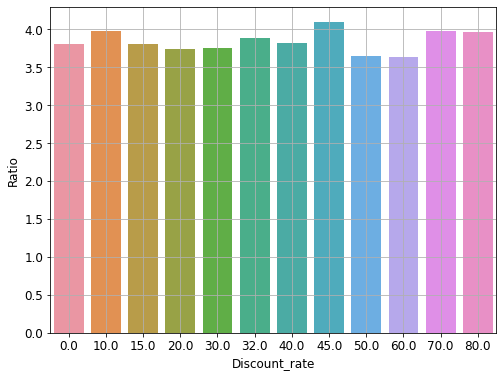

In [70]:
plt.figure(figsize=(8,6))
sns.barplot(x='Discount_rate',y='Ratio',data=ratio_df1)
plt.grid()

At per count of 45% of Discount Rate total quantity of goods sold was highest (more than 4)

## **CONCLUSIONS AND INFERENCES**
Offering Discount is one of the incentives of drawing more Customers which is true for this data as with Discounted product it resulted in highest Sales though it has inverse impact on Profit for the Business.
Texas State is third highest and first highest when represented against Total Sales and Total Discount respectively and is the bottom most State when represented against Total Profit made.
Machines and Phones gain more profit in Consumer Segment.Chairs, Accessories, Appliances, Copiers gain more profit in Home Office Segment. Envelops, Labels gain more profit in Corporate segment Consumer segment.Thus, companies can be more oriented to target more particular audience for thier product.
Binders is most popular among customers and lowest selling price and highest Discount%, though offering Discounts definitely draw more Customers but on which Discount% is highest can be make lower in order it doesn't effect Sales and gain more Profit.
# **THANK YOU**
**DONE BY SATHWIKA**